## NAME: MANAS GOEL
## REGNO: 230968160

# **Football Player Analysis**

## Metadata of dataset
The dataset has 500 entries and 16 columns, covering various attributes of football players, including:

- Name: Player name.
- Position: Player’s position on the field.
- Age: Age of the player.
- Markey Value In Millions(£): Market value of the player in millions of pounds.
- Country: Country of the player.
- Club: Club the player is associated with.
- Performance Statistics: Includes Matches, Goals, Assists, Yellow Cards, Red Cards, and substitutions.

## Categories of analysis:
- [Position](#Position)
- [Country](#Country)
- [Age](#Age)
- [Club](#Club)
- [PlayervPlayer](#PlayervPlayer)


### Position


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('players.csv')
data

,Unnamed: 0,Name,Position,Age,Markey Value In Millions(£),Country,Club,Matches,Goals,Own Goals,Assists,Yellow Cards,Second Yellow Cards,Red Cards,Number Of Substitute In,Number Of Substitute Out
0,0,Kylian Mbappé,Centre-Forward,22,144.0,France,Paris Saint-Germain,16,7,0,11,3,0,0,0,8
1,1,Erling Haaland,Centre-Forward,21,135.0,Norway,Borussia Dortmund,10,13,0,4,1,0,0,0,1
2,2,Harry Kane,Centre-Forward,28,108.0,England,Tottenham Hotspur,16,7,0,2,2,0,0,2,2
3,3,Jack Grealish,Left Winger,26,90.0,England,Manchester City,15,2,0,3,1,0,0,2,8
4,4,Mohamed Salah,Right Winger,29,90.0,Egypt,Liverpool FC,15,15,0,6,1,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,Giorgian de Arrascaeta,Attacking Midfield,27,16.2,Uruguay,Clube de Regatas do Flamengo,0,0,0,0,0,0,0,0,0
496,496,Ayoze Pérez,Second Striker,28,16.2,Spain,Leicester City,8,1,0,3,0,0,1,2,5
497,497,Alex Meret,Goalkeeper,24,16.2,Italy,SSC Napoli,5,0,0,0,0,0,0,0,0
498,498,Duje Caleta-Car,Centre-Back,25,16.2,Croatia,Olympique Marseille,8,0,0,0,2,0,0,0,2


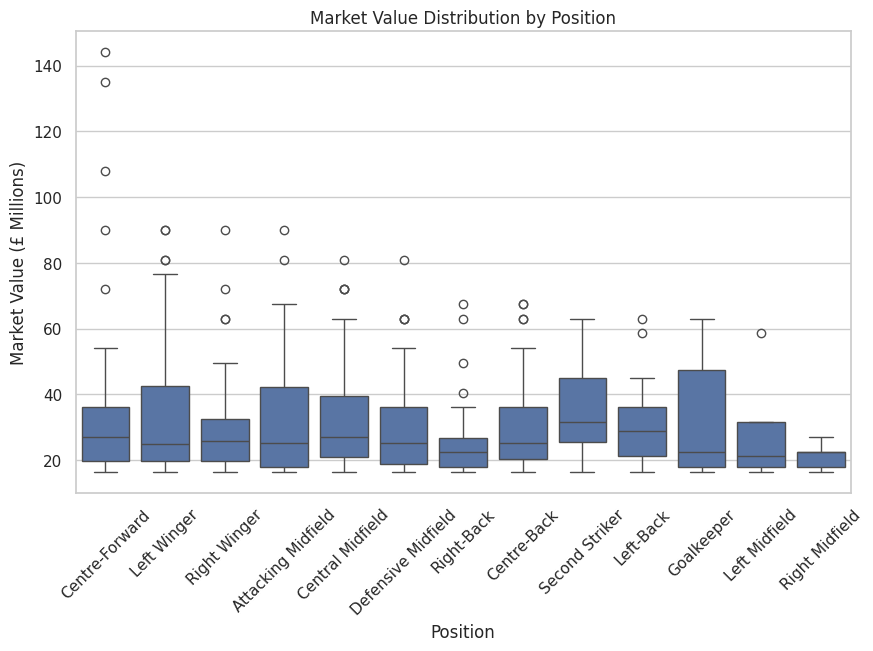

In [4]:
data = data.rename(columns={'Markey Value In Millions(£)': 'MarketValue'})
sns.set(style="whitegrid")

# 1. Market Value by Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Position', y='MarketValue')
plt.title('Market Value Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (£ Millions)')
plt.xticks(rotation=45)
plt.show()


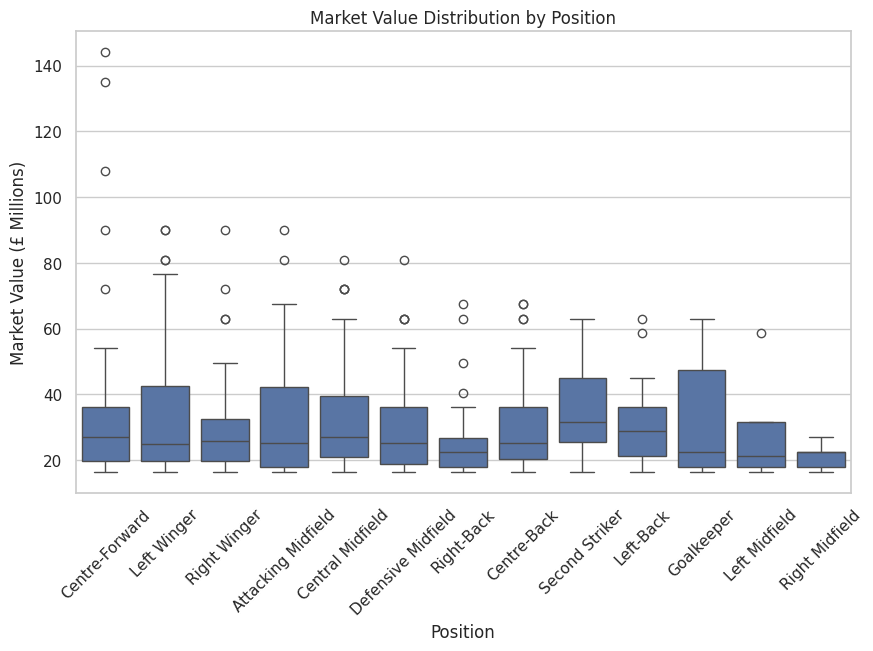

In [5]:
data = data.rename(columns={'Markey Value In Millions(£)': 'MarketValue'})
sns.set(style="whitegrid")

# 1. Market Value by Position
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Position', y='MarketValue')
plt.title('Market Value Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Market Value (£ Millions)')
plt.xticks(rotation=45)
plt.show()

From this graph we can tell:
- Centre-Forwards tend to have the highest median market value, reflecting their role in helping teams win games.
- Wingers and Midfielders also show high market values, likely due to their ability to set up centre forwards and dictate the game.

### Country


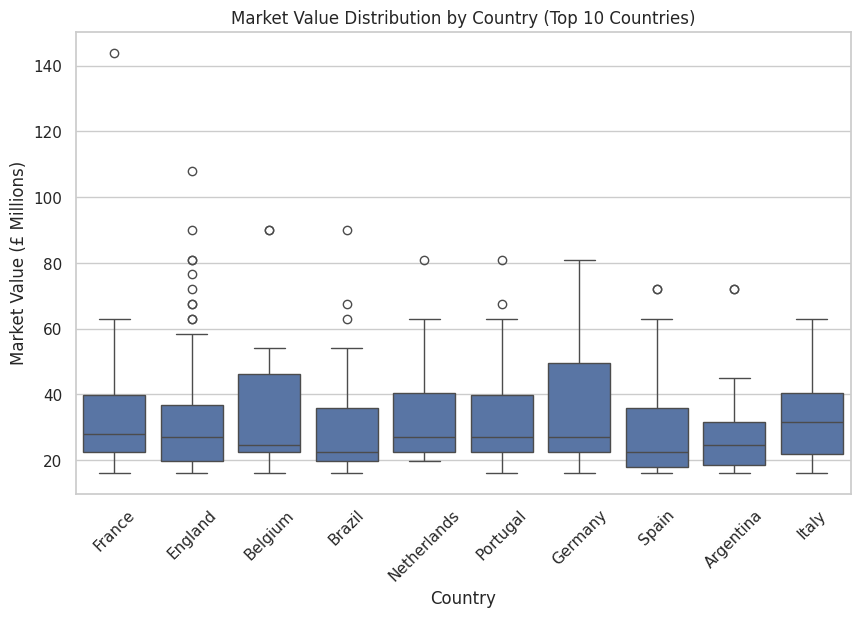

In [6]:
# 2. Market Value by Country (Top 10 most represented countries)
top_countries = data['Country'].value_counts().head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data['Country'].isin(top_countries)], x='Country', y='MarketValue')
plt.title('Market Value Distribution by Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Market Value (£ Millions)')
plt.xticks(rotation=45)
plt.show()

From the graph we can tell:
- French and Brazilian players appear to command high market values, possibly due to their established leagues and history of producing top talent.
- Players from England have a lot of high market value due to the fact that the Premier League is the richest league in the world

### Age


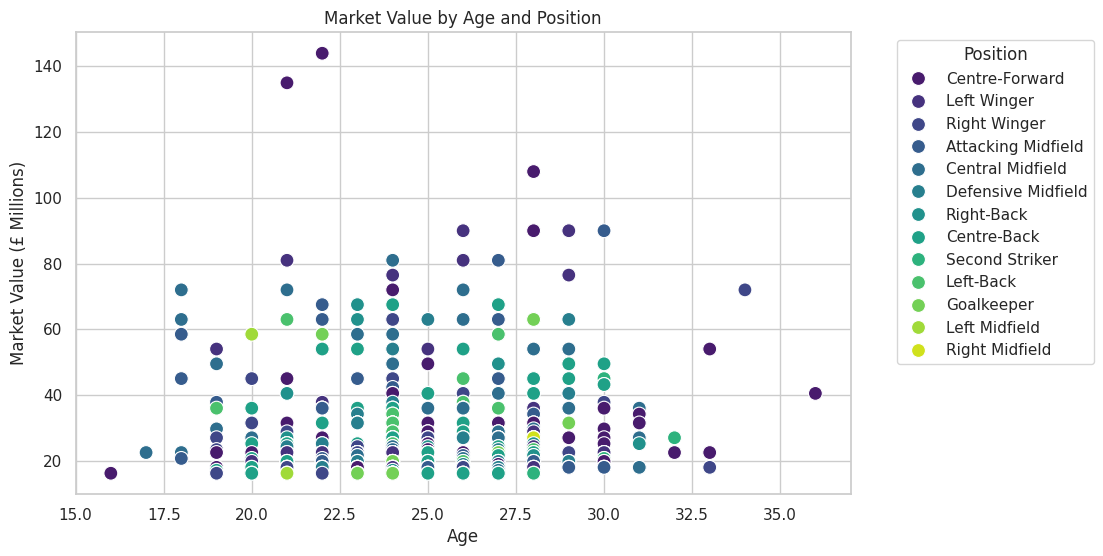

In [7]:
# 3. Market Value by Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='MarketValue', hue='Position', palette='viridis', edgecolor="w", s=100)
plt.title('Market Value by Age and Position')
plt.xlabel('Age')
plt.ylabel('Market Value (£ Millions)')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the graph we can tell:
- Younger players in their early 20s exhibit higher market values, indicating a premium on potential and longevity.
- There is a downward trend in market value as age increases beyond the late 20s, reflecting the typical peak years of athletic performance.

### Club

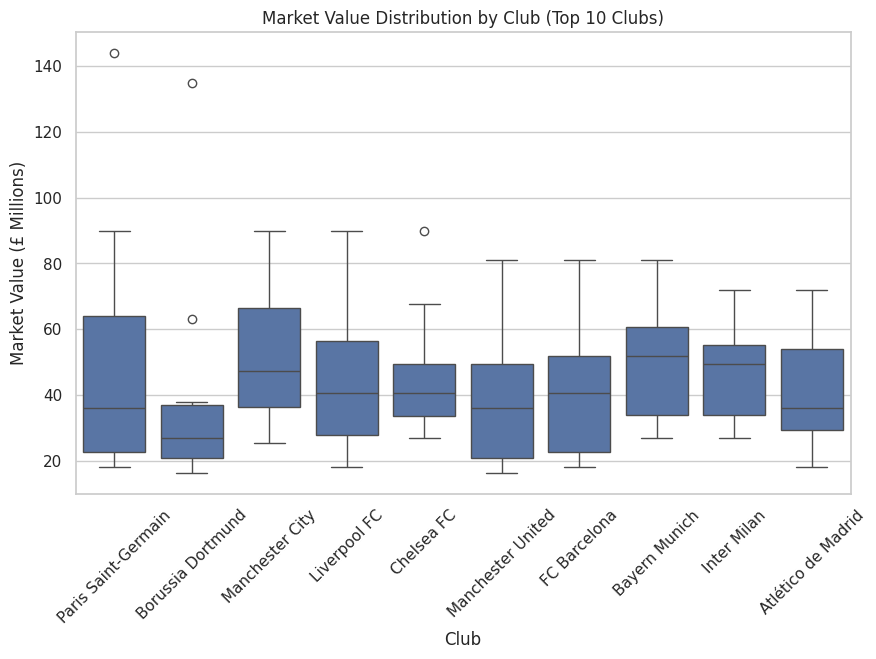

In [8]:
# 4. Market Value by Club (Top 10 most valuable clubs)
top_clubs = data.groupby('Club')['MarketValue'].mean().sort_values(ascending=False).head(10).index
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[data['Club'].isin(top_clubs)], x='Club', y='MarketValue')
plt.title('Market Value Distribution by Club (Top 10 Clubs)')
plt.xlabel('Club')
plt.ylabel('Market Value (£ Millions)')
plt.xticks(rotation=45)
plt.show()

From this graph we cann conclude:
- Clubs like Paris Saint-Germain and Manchester City show high market value distributions, aligning with their financial capabilities and recent investments in top players.
- Clubs with strong reputations in European competitions and good scouting and recruitment (e.g., Liverpool, Borussia Dortmund) also display higher average market values for their players because they buy players at low prices and develop them over time

### Player vs Player
Comparing the two most valuable players in the market

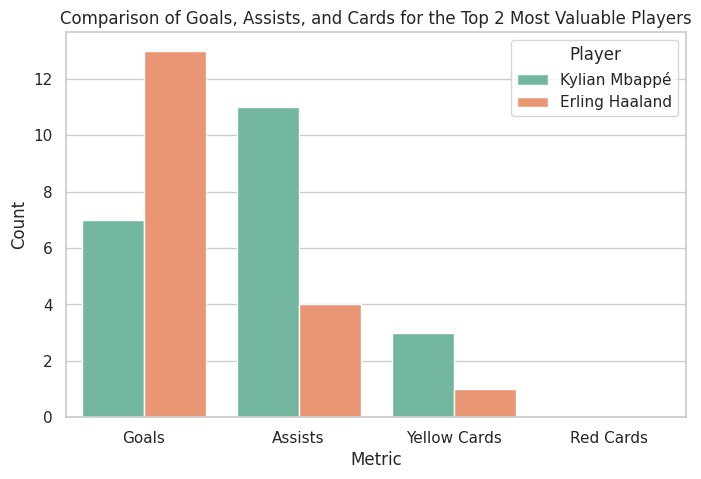

In [9]:
# 5. Comparison of the Two Most Valuable Players
# Identify the top two players by Market Value
top_two_players = data.nlargest(2, 'MarketValue')[['Name', 'Position', 'Age', 'Country', 'Club', 'MarketValue', 'Matches', 'Goals', 'Assists', 'Yellow Cards', 'Red Cards']]


# Create a bar plot for comparison of the two players' goals, assists, and cards
comparison_metrics = ['Goals', 'Assists', 'Yellow Cards', 'Red Cards']
comparison_data = top_two_players.melt(id_vars=['Name'], value_vars=comparison_metrics, var_name='Metric', value_name='Count')

plt.figure(figsize=(8, 5))
sns.barplot(data=comparison_data, x='Metric', y='Count', hue='Name', palette='Set2')
plt.title('Comparison of Goals, Assists, and Cards for the Top 2 Most Valuable Players')
plt.xlabel('Metric')
plt.ylabel('Count')
plt.legend(title='Player')
plt.show()

From this we can deduce:
- Goals: Haaland has a higher goal count despite playing fewer matches, highlighting his efficiency as a scorer.
- Assists: Mbappé has more assists, indicating his all rounded playstyle.
- Disciplinary Record: Mbappé has slightly more yellow cards, which may reflect a more aggressive style on the field.